In [71]:
import numpy as np

In [72]:
path = "data/r 2022-07-12 13:42:07.041613.csv"
headers = np.loadtxt(path, delimiter=",", dtype="str", max_rows=1)
data = np.loadtxt(path, delimiter=",", skiprows=1)
data = np.delete(data, 3, 1) # extra column written by mistake

In [73]:
headers

array(['trial', 'line_length', 'line_angle', 'stim_radius', 'stim_period',
       'rating'], dtype='<U11')

In [74]:
data.shape

(108, 6)

In [75]:
block1 = data[:30]
block2 = data[30:60]
block3 = data[60:-30]
block4 = data[-30:]
block1 = np.reshape(block1, (3, 10, -1))
block2 = np.reshape(block2, (3, 10, -1))
block3 = np.reshape(block3, (3, 6, -1))
block4 = np.reshape(block4, (3, 10, -1))

for i in range(3):
    block1[i] = block1[i][block1[i][:,1].argsort()]
    block2[i] = block2[i][block2[i][:,2].argsort()]
    block3[i] = block3[i][block3[i][:,3].argsort()]
    block4[i] = block4[i][block4[i][:,4].argsort()]

In [76]:
block3

array([[[ 61., 220.,  40., 220., 100.,   5.],
        [ 65., 220.,  40., 250., 100.,  18.],
        [ 62., 220.,  40., 280., 100.,  61.],
        [ 63., 220.,  40., 310., 100.,  28.],
        [ 64., 220.,  40., 340., 100.,  21.],
        [ 60., 220.,  40., 370., 100.,  51.]],

       [[ 69., 220.,  40., 220., 100.,  12.],
        [ 66., 220.,  40., 250., 100.,  38.],
        [ 67., 220.,  40., 280., 100.,  77.],
        [ 71., 220.,  40., 310., 100.,  23.],
        [ 68., 220.,  40., 340., 100.,  56.],
        [ 70., 220.,  40., 370., 100.,  63.]],

       [[ 75., 220.,  40., 220., 100.,  36.],
        [ 77., 220.,  40., 250., 100.,  29.],
        [ 73., 220.,  40., 280., 100.,  11.],
        [ 74., 220.,  40., 310., 100.,  51.],
        [ 76., 220.,  40., 340., 100.,  69.],
        [ 72., 220.,  40., 370., 100.,  23.]]])

In [77]:
ratings1 = (block1[0,:,-1] + block1[1,:,-1] + block1[2,:,-1]) / 3
ratings2 = (block2[0,:,-1] + block2[1,:,-1] + block2[2,:,-1]) / 3
ratings3 = (block3[0,:,-1] + block3[1,:,-1] + block3[2,:,-1]) / 3
ratings4 = (block4[0,:,-1] + block4[1,:,-1] + block4[2,:,-1]) / 3

In [78]:
error1 = [np.std(block1[:,i,5]) / np.sqrt(3) for i in range(10)]
error2 = [np.std(block2[:,i,5]) / np.sqrt(3) for i in range(10)]
error3 = [np.std(block3[:,i,5]) / np.sqrt(3) for i in range(6)]
error4 = [np.std(block4[:,i,5]) / np.sqrt(3) for i in range(10)]

In [79]:
keys1 = block1[0,:,1]
keys2 = block2[0,:,2]
keys3 = block3[0,:,3]
keys4 = block4[0,:,4]

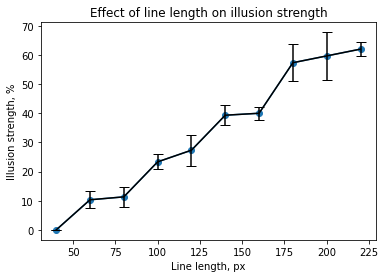

In [84]:
import matplotlib.pyplot as plt
ax = plt.subplot()
plt.scatter(keys1, ratings1)
plt.plot(keys1, ratings1)
plt.errorbar(keys1, ratings1, error1, color="black", capsize=5)
ax.set_title("Effect of line length on illusion strength")
ax.set_xlabel("Line length, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

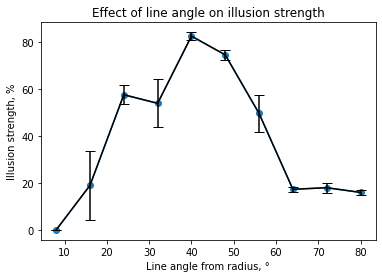

In [85]:
ax = plt.subplot()
plt.scatter(keys2, ratings2)
plt.plot(keys2, ratings2)
plt.errorbar(keys2, ratings2, error2, color="black", capsize=5)
ax.set_title("Effect of line angle on illusion strength")
ax.set_xlabel("Line angle from radius, °")
ax.set_ylabel("Illusion strength, %")
plt.show()

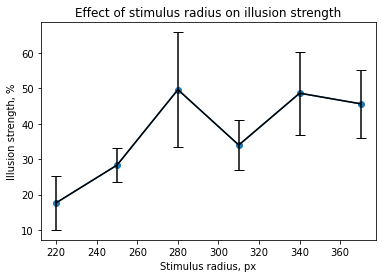

In [82]:
ax = plt.subplot()
plt.scatter(keys3, ratings3)
plt.plot(keys3, ratings3)
plt.errorbar(keys3, ratings3, error3, color="black", capsize=5)
ax.set_title("Effect of stimulus radius on illusion strength")
ax.set_xlabel("Stimulus radius, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

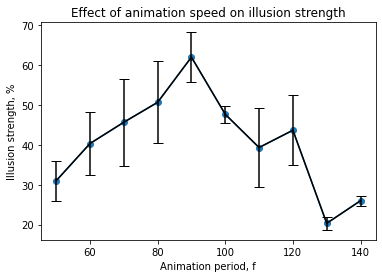

In [86]:
ax = plt.subplot()
plt.scatter(keys4, ratings4)
plt.plot(keys4, ratings4)
plt.errorbar(keys4, ratings4, error4, color="black", capsize=5)
ax.set_title("Effect of animation speed on illusion strength")
ax.set_xlabel("Animation period, f")
ax.set_ylabel("Illusion strength, %")
plt.show()

Combined

In [48]:
path = "data/12345 2022-07-12 15:22:39.492870.csv"
headers = np.loadtxt(path, delimiter=",", dtype="str", max_rows=1)
data = np.loadtxt(path, delimiter=",", skiprows=1)

In [54]:
data = data[:60]
data.shape

(60, 6)

In [55]:
block1 = data[:30]
block2 = data[30:]

In [56]:
block1 = np.reshape(block1, (3, 10, -1))
block2 = np.reshape(block2, (3, 10, -1))

In [57]:
for i in range(3):
    block1[i] = block1[i][block1[i][:,1].argsort()]
    block2[i] = block2[i][block2[i][:,2].argsort()]

In [60]:
ratings1 = (block1[0,:,-1] + block1[1,:,-1] + block1[2,:,-1]) / 3
ratings2 = (block2[0,:,-1] + block2[1,:,-1] + block2[2,:,-1]) / 3

In [67]:
error1 = [np.std(block1[:,i,5]) / np.sqrt(3) for i in range(10)]
error2 = [np.std(block2[:,i,5]) / np.sqrt(3) for i in range(10)]

In [68]:
keys1 = block1[0,:,1]
keys2 = block2[0,:,2]

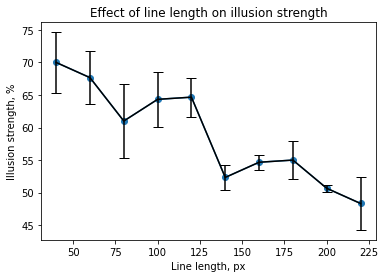

In [69]:
ax = plt.subplot()
plt.scatter(keys1, ratings1)
plt.plot(keys1, ratings1)
plt.errorbar(keys1, ratings1, error1, color="black", capsize=5)
ax.set_title("Effect of line length on illusion strength")
ax.set_xlabel("Line length, px")
ax.set_ylabel("Illusion strength, %")
plt.show()

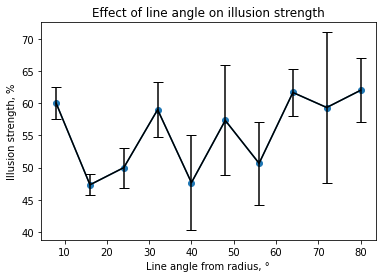

In [66]:
ax = plt.subplot()
plt.scatter(keys2, ratings2)
plt.plot(keys2, ratings2)
plt.errorbar(keys2, ratings2, error2, color="black", capsize=5)
ax.set_title("Effect of line angle on illusion strength")
ax.set_xlabel("Line angle from radius, °")
ax.set_ylabel("Illusion strength, %")
plt.show()